# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# import json
url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        #print(json.dumps(city_weather_json, indent=4, sort_keys=True)) # see how things are organized
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['city']['coord']['lat']
        city_lng = city_weather_json['city']['coord']['lon']
        list_of_max_temps = [item['main']['temp_max'] for item in city_weather_json['list']] # generate list
        city_max_temp = np.max(list_of_max_temps) # max value of list
        city_max_temp_celsius = round(city_max_temp - 273.15, 2) # convert to celsius
        index_of_hottest_day = list_of_max_temps.index(city_max_temp) # get index from list
        city_humidity = city_weather_json['list'][index_of_hottest_day]['main']['humidity'] # use index for other queries
        city_clouds = city_weather_json['list'][index_of_hottest_day]['clouds']['all']
        city_wind = city_weather_json['list'][index_of_hottest_day]['wind']['speed']
        city_country = city_weather_json['city']['country']
        city_date = city_weather_json['list'][index_of_hottest_day]['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp_celsius,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | obock
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 1 | rio segundo
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | olyokminsk
Processing Record 8 of Set 1 | freeport
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | inari
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ranchettes
Processing Record 21 of Set 1 | praia da vitoria
Processing Record 22 of Set

Processing Record 41 of Set 4 | calchaqui
Processing Record 42 of Set 4 | malango
Processing Record 43 of Set 4 | melekeok village
Processing Record 44 of Set 4 | scarborough
Processing Record 45 of Set 4 | port mathurin
Processing Record 46 of Set 4 | acapulco de juarez
Processing Record 47 of Set 4 | alvear
Processing Record 48 of Set 4 | ciudad lazaro cardenas
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | nova sintra
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | manthani
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | grand rapids
Processing Record 7 of Set 5 | gizo
Processing Record 8 of Set 5 | ixtapa
Processing Record 9 of Set 5 | bure
Processing Record 10 of Set 5 | arkhangel'sk
Processing Record 11 of Set 5 | waterloo
Processing Record 12 of Set 5 | puli
Processing Record 13 of Set 5 | odienne
Processing Record 14 of Set 5 | ola
Proc

Processing Record 31 of Set 8 | wellington
Processing Record 32 of Set 8 | port-vila
Processing Record 33 of Set 8 | les anglais
Processing Record 34 of Set 8 | kodinsk
Processing Record 35 of Set 8 | sidqabad
City not found. Skipping...
Processing Record 36 of Set 8 | mata-utu
Processing Record 37 of Set 8 | bonthe
Processing Record 38 of Set 8 | sarai naurang
Processing Record 39 of Set 8 | filadelfia
Processing Record 40 of Set 8 | youssoufia
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | port saint john's
Processing Record 43 of Set 8 | rumonge
Processing Record 44 of Set 8 | porto novo
Processing Record 45 of Set 8 | pyeongchang
City not found. Skipping...
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | motueka
Processing Record 48 of Set 8 | whangarei
Processing Record 49 of Set 8 | borogontsy
Processing Record 0 of Set 9 | wajir
Processing Record 1 of Set 9 | baotou
Processing Record 2 of Set 9 | antonina
Processing Record 3 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df)

# Show Record Count
city_data_df.count()

                        City      Lat       Lng  Max Temp  Humidity  \
0                      obock  12.2500   43.0833     37.70        21   
1                  grytviken -54.2811  -36.5092      2.80        99   
2                   waitangi -43.9535 -176.5597     11.95        84   
3                rio segundo -31.6526  -63.9099     25.89        36   
4                   hamilton  39.1834  -84.5333     37.01        23   
..                       ...      ...       ...       ...       ...   
534  ostrowiec swietokrzyski  50.9294   21.3853     23.24        40   
535                kununurra -15.7667  128.7333     35.70        15   
536                   caorle  45.5966   12.8758     28.40        57   
537                gracanica  44.7033   18.3097     31.23        28   
538                whitefish  48.4111 -114.3376     27.45        30   

     Cloudiness  Wind Speed Country        Date  
0            19        3.14      DJ  1693742400  
1           100        0.99      GS  1693515600

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,obock,12.2500,43.0833,37.70,21,19,3.14,DJ,1693742400
1,grytviken,-54.2811,-36.5092,2.80,99,100,0.99,GS,1693515600
2,waitangi,-43.9535,-176.5597,11.95,84,19,8.39,NZ,1693558800
3,rio segundo,-31.6526,-63.9099,25.89,36,99,1.20,AR,1693591200
4,hamilton,39.1834,-84.5333,37.01,23,0,2.16,US,1693861200


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,obock,12.2500,43.0833,37.70,21,19,3.14,DJ,1693742400
1,grytviken,-54.2811,-36.5092,2.80,99,100,0.99,GS,1693515600
2,waitangi,-43.9535,-176.5597,11.95,84,19,8.39,NZ,1693558800
3,rio segundo,-31.6526,-63.9099,25.89,36,99,1.20,AR,1693591200
4,hamilton,39.1834,-84.5333,37.01,23,0,2.16,US,1693861200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

City_ID
0      12.2500
1     -54.2811
2     -43.9535
3     -31.6526
4      39.1834
        ...   
534    50.9294
535   -15.7667
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 539, dtype: float64
City_ID
0      37.70
1       2.80
2      11.95
3      25.89
4      37.01
       ...  
534    23.24
535    35.70
536    28.40
537    31.23
538    27.45
Name: Max Temp, Length: 539, dtype: float64


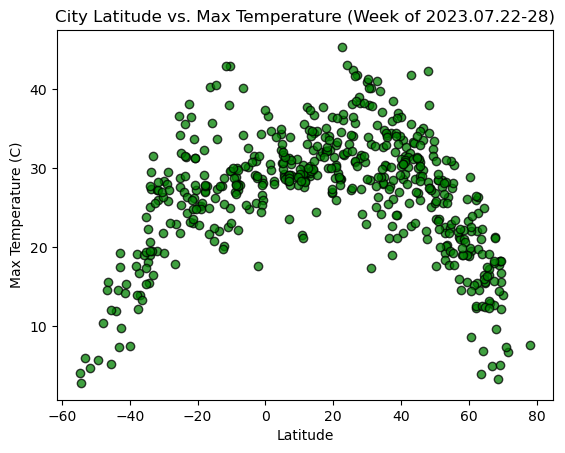

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Incorporate the other graph properties
y_axis_scatter1 = city_data_df['Max Temp']
print(y_axis_scatter1)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter1, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Max Temperature (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

City_ID
0      12.2500
1     -54.2811
2     -43.9535
3     -31.6526
4      39.1834
        ...   
534    50.9294
535   -15.7667
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 539, dtype: float64
City_ID
0      21
1      99
2      84
3      36
4      23
       ..
534    40
535    15
536    57
537    28
538    30
Name: Humidity, Length: 539, dtype: int64


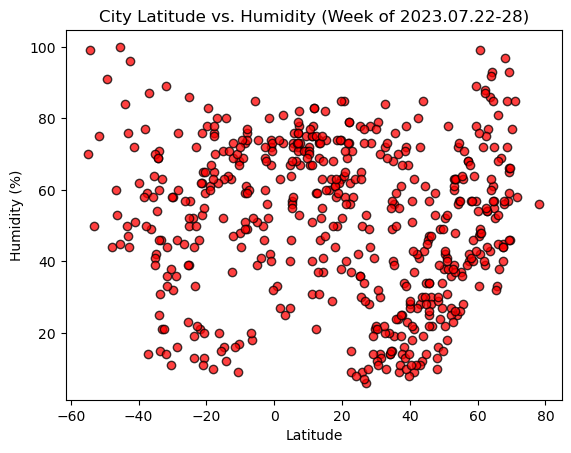

<Figure size 640x480 with 0 Axes>

In [12]:


# Build the scatter plots for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity in percentage
y_axis_scatter2 = city_data_df['Humidity']
print(y_axis_scatter2)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter2, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Humidity (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

City_ID
0      12.2500
1     -54.2811
2     -43.9535
3     -31.6526
4      39.1834
        ...   
534    50.9294
535   -15.7667
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 539, dtype: float64
City_ID
0       19
1      100
2       19
3       99
4        0
      ... 
534     42
535     15
536    100
537     68
538     61
Name: Cloudiness, Length: 539, dtype: int64


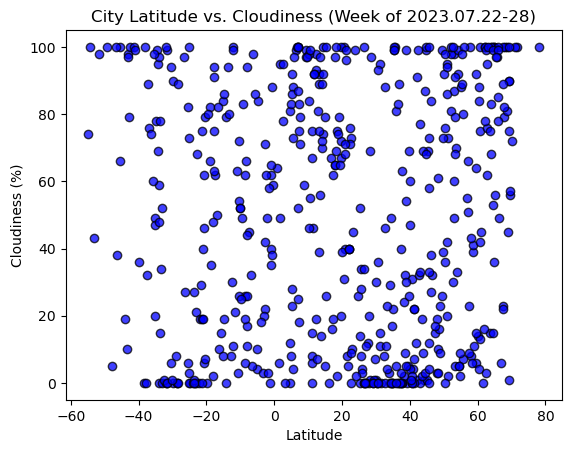

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness in percentage
y_axis_scatter3 = city_data_df['Cloudiness']
print(y_axis_scatter3)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Cloudiness (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

City_ID
0      12.2500
1     -54.2811
2     -43.9535
3     -31.6526
4      39.1834
        ...   
534    50.9294
535   -15.7667
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 539, dtype: float64
City_ID
0      3.14
1      0.99
2      8.39
3      1.20
4      2.16
       ... 
534    3.86
535    5.66
536    1.33
537    1.76
538    5.05
Name: Wind Speed, Length: 539, dtype: float64


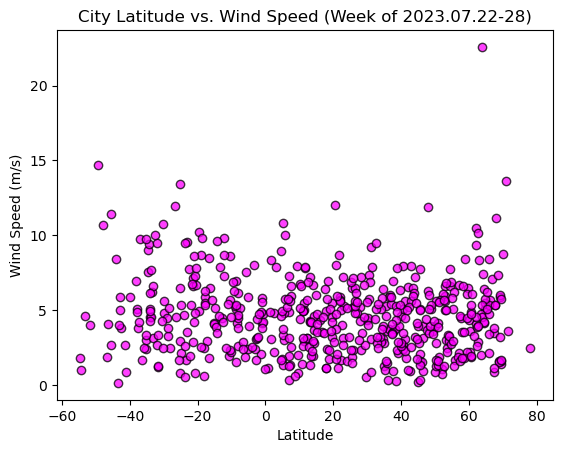

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = city_data_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed in percentage
y_axis_scatter4 = city_data_df['Wind Speed']
print(y_axis_scatter4)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter4, marker="o", facecolors="magenta", edgecolors="black",
             alpha=0.75)

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("City Latitude vs. Wind Speed (Week of 2023.07.22-28)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,obock,12.2500,43.0833,37.70,21,19,3.14,DJ,1693742400
4,hamilton,39.1834,-84.5333,37.01,23,0,2.16,US,1693861200
5,olyokminsk,60.3736,120.4264,28.83,33,84,3.61,RU,1693461600
6,freeport,40.6576,-73.5832,28.65,51,31,2.70,US,1693850400
7,sisimiut,66.9395,-53.6735,4.97,69,6,7.08,GL,1693580400


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,2.80,99,100,0.99,GS,1693515600
2,waitangi,-43.9535,-176.5597,11.95,84,19,8.39,NZ,1693558800
3,rio segundo,-31.6526,-63.9099,25.89,36,99,1.20,AR,1693591200
8,carnarvon,-24.8667,113.6333,25.27,57,0,5.35,AU,1693461600
15,puerto natales,-51.7236,-72.4875,4.64,75,98,4.04,CL,1693591200


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0      12.2500
4      39.1834
5      60.3736
6      40.6576
7      66.9395
        ...   
532    19.3667
534    50.9294
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 373, dtype: float64
City_ID
0      37.70
4      37.01
5      28.83
6      28.65
7       4.97
       ...  
532    29.97
534    23.24
536    28.40
537    31.23
538    27.45
Name: Max Temp, Length: 373, dtype: float64
y = -0.24x + 36.58
The r value is: -0.6417560634174699


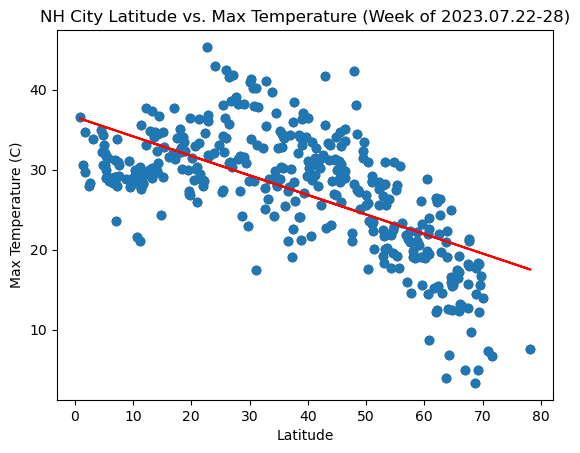

In [19]:
# Linear regression on Northern Hemisphere for Fig5
# Build scatter plot for latitude vs. temperature
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for max temperature in degree celsius
y_axis_scatter5 = northern_hemi_df['Max Temp']
print(y_axis_scatter5)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter5, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter5)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter5)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Max Temperature (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()



City_ID
1     -54.2811
2     -43.9535
3     -31.6526
8     -24.8667
15    -51.7236
        ...   
521   -28.2925
523    -8.6199
529   -20.5167
533   -10.0681
535   -15.7667
Name: Lat, Length: 166, dtype: float64
City_ID
1       2.80
2      11.95
3      25.89
8      25.27
15      4.64
       ...  
521    27.16
523    27.83
529    24.83
533    23.03
535    35.70
Name: Max Temp, Length: 166, dtype: float64
y = 0.39x + 33.34
The r value is: 0.6880158038573335


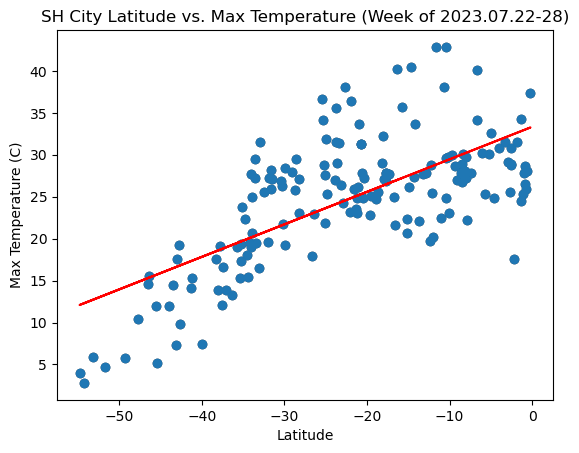

In [20]:
# Linear regression on Southern Hemisphere for Fig6
# Build scatter plot for latitude vs. temperature
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for max temperature in degree celsius
y_axis_scatter6 = southern_hemi_df['Max Temp']
print(y_axis_scatter6)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter6, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig6
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter6)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter6)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Max Temperature (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** The graph for the the northern hemisphere has a negative slope and r value, while the southern hemisphere shows the opposite.

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      12.2500
4      39.1834
5      60.3736
6      40.6576
7      66.9395
        ...   
532    19.3667
534    50.9294
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 373, dtype: float64
City_ID
0      21
4      23
5      33
6      51
7      69
       ..
532    74
534    40
536    57
537    28
538    30
Name: Humidity, Length: 373, dtype: int64
y = -0.11x + 54.1
The r value is: -0.09620428384619754


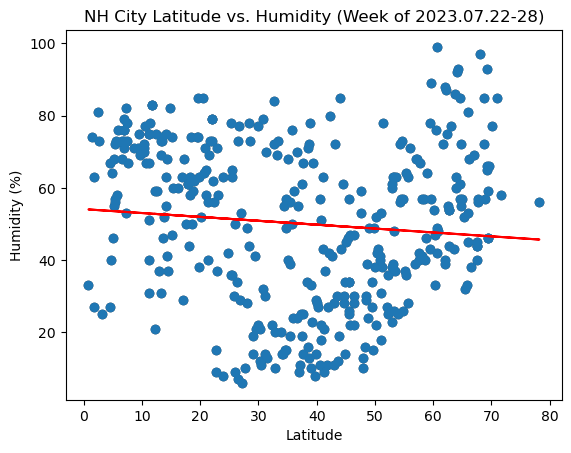

In [22]:
# Linear regression on Northern Hemisphere for Fig7
# Build scatter plot for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity
y_axis_scatter7 = northern_hemi_df['Humidity']
print(y_axis_scatter7)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter7, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig7
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter7)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter7)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Humidity (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()



City_ID
1     -54.2811
2     -43.9535
3     -31.6526
8     -24.8667
15    -51.7236
        ...   
521   -28.2925
523    -8.6199
529   -20.5167
533   -10.0681
535   -15.7667
Name: Lat, Length: 166, dtype: float64
City_ID
1      99
2      84
3      36
8      57
15     75
       ..
521    76
523    49
529    65
533    72
535    15
Name: Humidity, Length: 166, dtype: int64
y = -0.03x + 53.06
The r value is: -0.016768180235910757


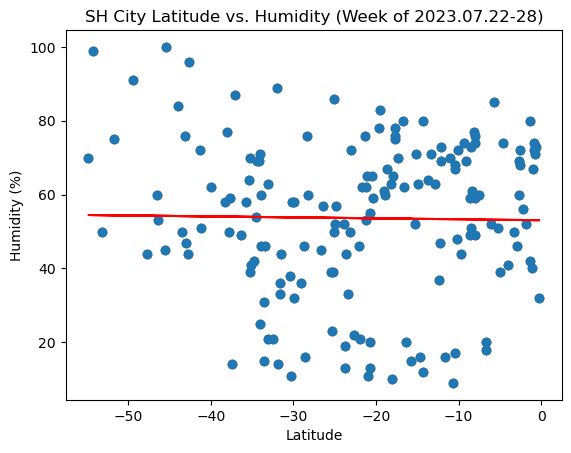

In [24]:
# Linear regression on Southern Hemisphere for Fig8
# Build scatter plot for latitude vs. humidity
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for humidity
y_axis_scatter8 = southern_hemi_df['Humidity']
print(y_axis_scatter8)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter8, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig8
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter8)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter8)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Humidity (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()



**Discussion about the linear relationship:** Both graphs have small negative slopes and r values, likely to scatterd data. In both charts, as latitude increases, the humidity slightly decreases

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      12.2500
4      39.1834
5      60.3736
6      40.6576
7      66.9395
        ...   
532    19.3667
534    50.9294
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 373, dtype: float64
City_ID
0       19
4        0
5       84
6       31
7        6
      ... 
532     65
534     42
536    100
537     68
538     61
Name: Cloudiness, Length: 373, dtype: int64
y = 0.09x + 45.75
The r value is: 0.0476334725067948


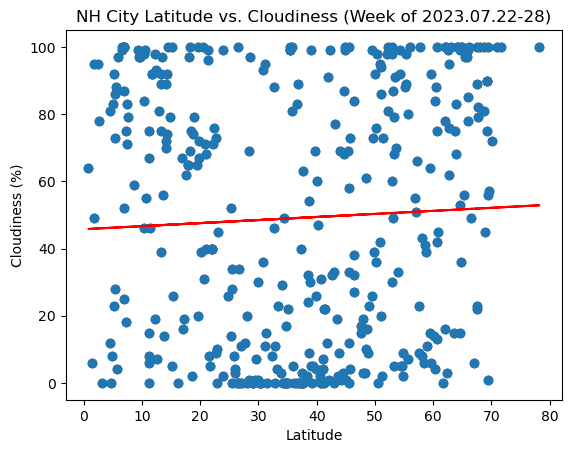

In [25]:
# Linear regression on Northern Hemisphere for Fig9
# Build scatter plot for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness
y_axis_scatter9 = northern_hemi_df['Cloudiness']
print(y_axis_scatter9)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter9, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig9
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter9)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter9)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Cloudiness (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()



City_ID
1     -54.2811
2     -43.9535
3     -31.6526
8     -24.8667
15    -51.7236
        ...   
521   -28.2925
523    -8.6199
529   -20.5167
533   -10.0681
535   -15.7667
Name: Lat, Length: 166, dtype: float64
City_ID
1      100
2       19
3       99
8        0
15      98
      ... 
521     89
523     19
529      7
533     52
535     15
Name: Cloudiness, Length: 166, dtype: int64
y = -0.45x + 36.07
The r value is: -0.17369022885504906


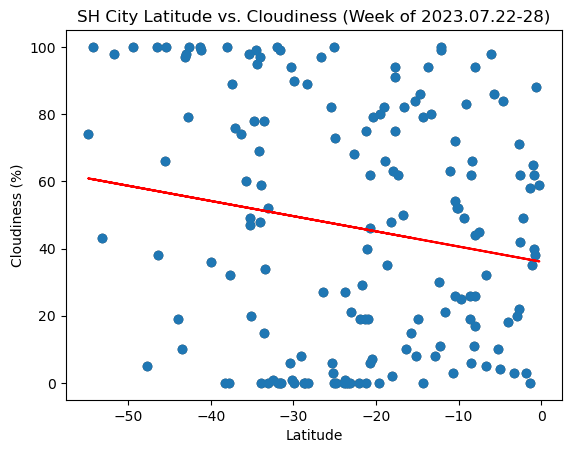

In [26]:
# Linear regression on Southern Hemisphere for Fig10
# Build scatter plot for latitude vs. cloudiness
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for cloudiness
y_axis_scatter10 = southern_hemi_df['Cloudiness']
print(y_axis_scatter10)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter10, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig10
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter10)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter10)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Cloudiness (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** The northern graph has a positive slope and r value, while the southern graph has a negative slope and r value

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      12.2500
4      39.1834
5      60.3736
6      40.6576
7      66.9395
        ...   
532    19.3667
534    50.9294
536    45.5966
537    44.7033
538    48.4111
Name: Lat, Length: 373, dtype: float64
City_ID
0      3.14
4      2.16
5      3.61
6      2.70
7      7.08
       ... 
532    3.60
534    3.86
536    1.33
537    1.76
538    5.05
Name: Wind Speed, Length: 373, dtype: float64
y = 0.01x + 4.15
The r value is: 0.04819437712945884


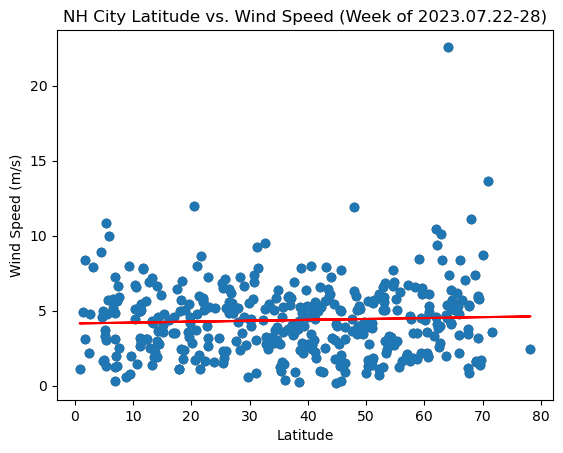

In [27]:
# Linear regression on Northern Hemisphere for Fig11
# Build scatter plot for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = northern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed
y_axis_scatter11 = northern_hemi_df['Wind Speed']
print(y_axis_scatter11)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter11, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig11
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter11)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter11)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("NH City Latitude vs. Wind Speed (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

City_ID
1     -54.2811
2     -43.9535
3     -31.6526
8     -24.8667
15    -51.7236
        ...   
521   -28.2925
523    -8.6199
529   -20.5167
533   -10.0681
535   -15.7667
Name: Lat, Length: 166, dtype: float64
City_ID
1      0.99
2      8.39
3      1.20
8      5.35
15     4.04
       ... 
521    5.13
523    1.56
529    7.82
533    4.57
535    5.66
Name: Wind Speed, Length: 166, dtype: float64
y = -0.02x + 4.56
The r value is: -0.09510541005108356


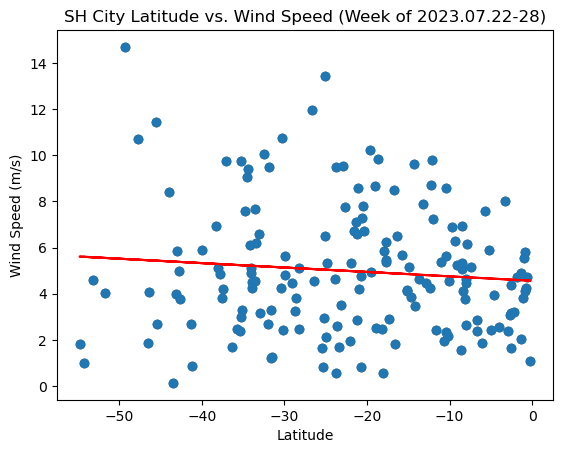

In [28]:
# Linear regression on Southern Hemisphere for Fig12
# Build scatter plot for latitude vs. wind speed
# Set x axis to numerical value for latitude
x_axis_scatter = southern_hemi_df['Lat']
print(x_axis_scatter)

# Set y axis to numerical value for wind speed
y_axis_scatter12 = southern_hemi_df['Wind Speed']
print(y_axis_scatter12)

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis_scatter, y_axis_scatter12, marker="o", facecolors="green", edgecolors="black",
             alpha=0.75)

# Define a function to create Linear Regression plot for Fig12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter12)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter12)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title("SH City Latitude vs. Wind Speed (Week of 2023.07.22-28)")

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()



**Discussion about the linear relationship:** The northern graph has a slightly positive slope and r value while the southern graph has a negative slope and r-value 